In [8]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# this uses a python package called librosa to create a spectrogram image from a WAV file.
def create_spectogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)
    

In [13]:
# converts all the WAV files in a directory to spectogra images.
def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    
    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectogram(input_file, output_file)
            

In [14]:
# create PNG files containing spectograms from the WAV files in the sound directory.

create_pngs_from_wavs('Data/Sounds/background', 'Data/Spectograms/background')
create_pngs_from_wavs('Data/Sounds/chainsaw', 'Data/Spectograms/chainsaw')
create_pngs_from_wavs('Data/Sounds/engine', 'Data/Spectograms/engine')
create_pngs_from_wavs('Data/Sounds/storm', 'Data/Spectograms/storm')

In [23]:
# load spectograms
from tensorflow.keras.preprocessing import image

def load_images_from_path(path, label):
    images, labels = [], []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append(label)
    
    return images, labels

# load images
def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={"xticks": [], "yticks": []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i]/ 255)

x, y = [], []

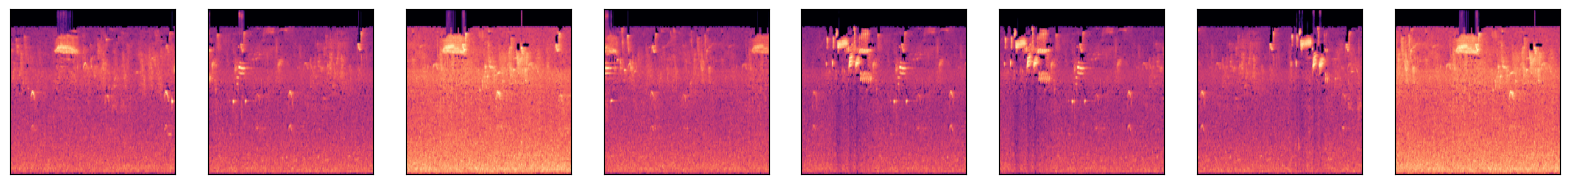

In [24]:
images, labels = load_images_from_path('Data/Spectograms/background', 0)
show_images(images)

x += images
y += labels

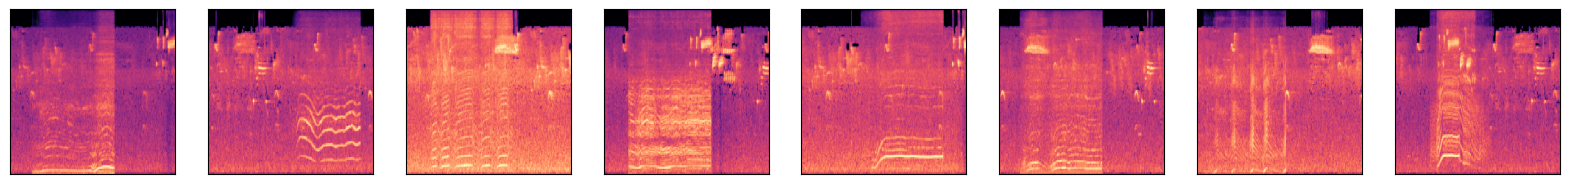

In [25]:
images, labels = load_images_from_path('Data/Spectograms/chainsaw', 1)
show_images(images)

x += images
y += labels

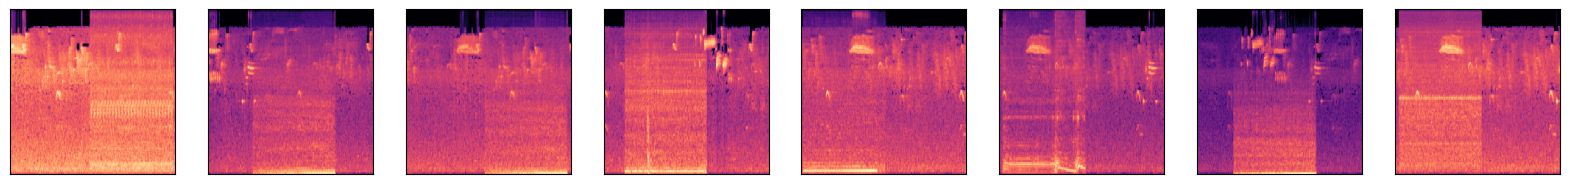

In [26]:
images, labels = load_images_from_path('Data/Spectograms/engine', 2)
show_images(images)

x += images
y += labels

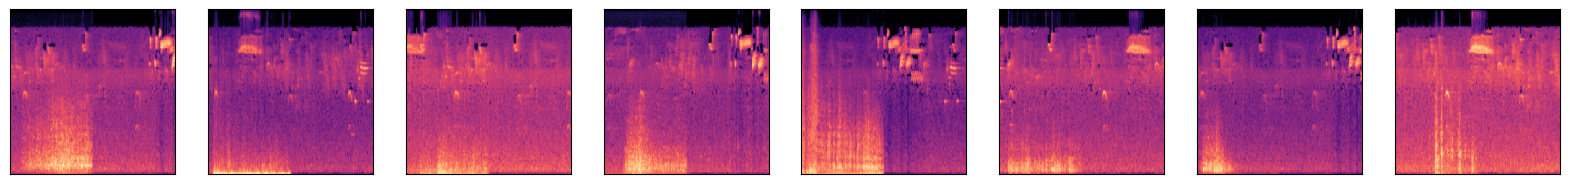

In [27]:
images, labels = load_images_from_path('Data/Spectograms/storm', 3)
show_images(images)

x += images
y += labels

In [28]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.mobilenet import preprocess_input

x = preprocess_input(np.array(x))
y = np.array(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [29]:
# Instantiate MobileNetV2 without the classification layer

from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
train_features = base_model.predict(x_train)
test_features = base_model.predict(x_test)

# Define neural network to classify features.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

2025-11-28 19:28:35.550075: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-11-28 19:28:35.550480: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-11-28 19:28:35.550506: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.92 GB
2025-11-28 19:28:35.550761: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-28 19:28:35.550791: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 48s 5us/step


2025-11-28 19:29:26.661238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 370ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step


In [30]:
# train the network with the features
hist = model.fit(train_features, y_train, validation_data=(test_features, y_test), batch_size=10, epochs=10)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.5643 - loss: 75.5115 - val_accuracy: 0.7833 - val_loss: 18.7064
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8536 - loss: 8.6740 - val_accuracy: 0.8083 - val_loss: 13.9605
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9179 - loss: 3.0631 - val_accuracy: 0.8583 - val_loss: 9.0640
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9071 - loss: 4.2955 - val_accuracy: 0.9167 - val_loss: 5.0663
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9536 - loss: 1.2450 - val_accuracy: 0.8667 - val_loss: 7.7247
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9607 - loss: 1.9921 - val_accuracy: 0.8833 - val_loss: 4.7535
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9929 - loss: 0.1103 - val_accuracy: 0.9250 - val_loss: 1.9343
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9929 - loss: 0.0602 - val_accuracy: 0.9083 

[]

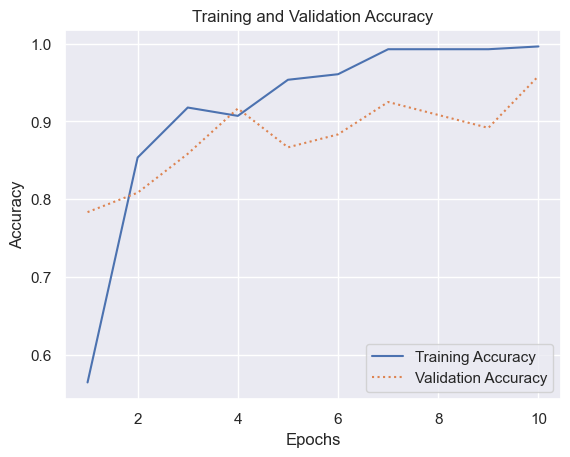

In [31]:
# Plot the training and validation accuracy
import seaborn as sns
sns.set_theme()

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


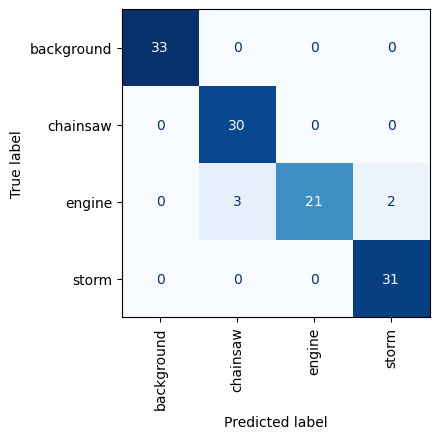

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

sns.reset_orig()
fig, ax = plt.subplots(figsize=(4, 4))
ax.grid(False)

y_pred = model.predict(test_features)
class_labels = ['background', 'chainsaw', 'engine', 'storm']

cmd.from_predictions(y_test, y_pred.argmax(axis=1), display_labels=class_labels, ax=ax, colorbar=False, cmap='Blues', xticks_rotation='vertical')

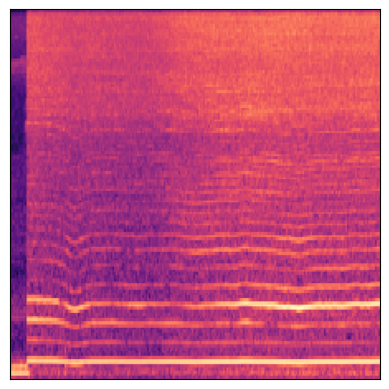

In [ ]:
# lets use trained model to analyze files for sounds of loggers cutting down trees
create_spectogram('Data/Sounds/samples/sample1.wav', 'Data/Spectograms/sample1.png')

x = image.load_img('Data/Spectograms/sample1.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [36]:
# preprocess the image and pass to MobileNet for feature extraction and classification

x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model.predict(x)
predictions = model.predict(y)

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
background: 0.0
chainsaw: 1.0
engine: 3.45845849156116e-35
storm: 0.0


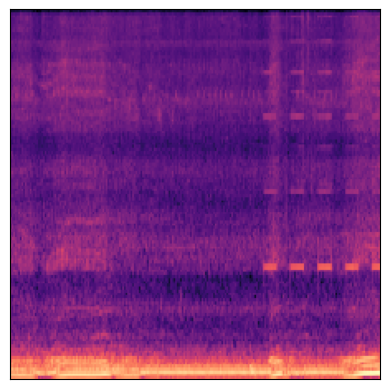

In [37]:
# lets use trained model to analyze files for sounds of logging truck rumbling through the forest
create_spectogram('Data/Sounds/samples/sample2.wav', 'Data/Spectograms/sample2.png')

x = image.load_img('Data/Spectograms/sample2.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [38]:
# preprocess the image and pass to MobileNet for feature extraction and classification

x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model.predict(x)
predictions = model.predict(y)

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
background: 0.0
chainsaw: 0.0
engine: 1.0
storm: 0.0
